# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


In [2]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
import importlib
import time

from unityagents import UnityEnvironment
import navigation_agent
import navigation_double_q_agent


# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

Buffer size:  100000
Batch size:  64
Gamma:  0.99
Tau:  0.001
Learning Rate:  0.0005
Update Every:  4
Buffer size:  100000
Batch size:  64
Gamma:  0.99
Tau:  0.001
Learning Rate:  0.0005
Update Every:  4


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Create Agent and Implement Training


In [13]:
nav_agent = navigation_agent.Agent(state_size=state_size, action_size=action_size, seed=0)

Episode 100	Average Score: 4.10
Episode 200	Average Score: 8.25
Episode 300	Average Score: 12.85
Episode 381	Average Score: 15.03
Environment solved in 281 episodes!	Average Score: 15.03


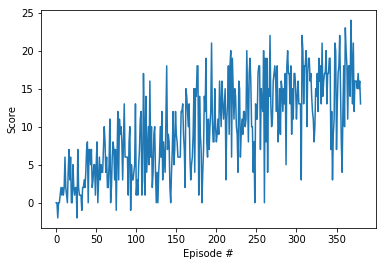

 ---> Backtesting Time in 5.7 Min


In [14]:
s_time = time.time()

#eps_decay=0.995 15.05 Min
#eps_decay=0.95 6.0 Min
#eps_decay=0.90 4.07 Min @15.02; Max avg score: 16.61 (on full episode); GAMMA=0.99; LR=5e-4
#eps_decay=0.85 6.7 Min @15.01; GAMMA=0.99; LR=5e-4

#eps_decay=0.90 6.2 Min @15.05; GAMMA=0.99; LR=1e-4

#eps_decay=0.90 29.7 Min; Max avg score: 10.87; GAMMA = 0.95; LR = 5e-3 

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.70):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]
        score = 0
        for t in range(max_t):

            action = nav_agent.act(state, eps)
        
            # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]  
            
            nav_agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(nav_agent.qnetwork_local.state_dict(), 'checkpoint_DQN.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(' ---> Backtesting Time in {} Min'.format(np.round((time.time()-s_time)/60,1)))

In [11]:
importlib.reload(navigation_double_q_agent)
nav_double_q_agent = navigation_double_q_agent.Agent(state_size=state_size, action_size=action_size, seed=0)

Buffer size:  100000
Batch size:  64
Gamma:  0.99
Tau:  0.001
Learning Rate:  0.0005
Update Every:  4


Episode 100	Average Score: 3.98
Episode 200	Average Score: 7.00
Episode 300	Average Score: 12.34
Episode 400	Average Score: 14.78
Episode 417	Average Score: 15.01
Environment solved in 317 episodes!	Average Score: 15.01


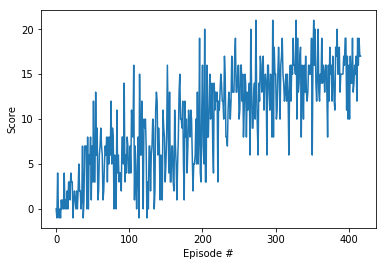

 ---> Backtesting Time in 6.4 Min


In [12]:
s_time = time.time()

#18.7 Min (CPU); 1091 episodes; @15.10; GAMMA=0.99; LR=5e-4; eps_decay=0.90; 
#16.3 Min (CPU); 914 episodes; @15.11; GAMMA=0.99; LR=5e-4; eps_decay=0.995; 
#7.5 Min (CPU); 503 episodes; @15.04; GAMMA=0.99; LR=5e-4; eps_decay=0.95; 
#8.9 Min (CPU); 468 episodes; @15.03; GAMMA=0.99; LR=5e-4; eps_decay=0.95; 
#6.4 Min (CPU); 317 episodes; @15.01; GAMMA=0.99; LR=5e-4; eps_decay=0.85; 



def dqn_double(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.85):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]
        score = 0
        for t in range(max_t):

            action = nav_double_q_agent.act(state, eps)
        
            # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]  
            
            nav_double_q_agent.step(state, action, reward, next_state, done)
            #break # *********
        
            state = next_state
            score += reward
            if done:
                break 
        #break # *********
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(nav_double_q_agent.qnetwork_local.state_dict(), 'checkpoint_double_DQN.pth')
            break
    return scores

scores = dqn_double()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(' ---> Backtesting Time in {} Min'.format(np.round((time.time()-s_time)/60,1)))